In [1]:
using LinearAlgebra, Plots, LaTeXStrings

In [2]:
include("Funciones")

InterpolLineal (generic function with 1 method)

# Proyecto Final-Trompo que gira sobre su eje

#### Física Computacional. Grupo 8266.

#### Facultad de Ciencias. Universidad Nacional Autónoma de México

 En este codigo desarrollamos una simulación de un trompo usando las técnicas vistas en clase y librerías de Julia

Definimos las ecuaciones que nos interesan

$$
V(\theta) \equiv \frac{(p_\varphi - p_\psi \cos{\theta})^2}{2 I_1 \sin^2{\theta} } + Mgh \cos{\theta}
$$
$$
E = E'+ \frac{1}{2} \frac{p^2_\psi}{I_3}
$$
$$
\dot{\theta}= \sqrt{\frac{2}{I_1}(E'-V)}
$$
$$
\dot{\varphi} = \frac{p_\varphi - p_\psi \cos{\theta}}{I_1 \sin^2{\theta}}
$$
$$
\dot{\psi} = \frac{p_\psi}{I_3} - \frac{(p_\varphi - p_\psi \cos{\theta}) \cos{\theta}}{I_1 \sin^2{\theta}}
$$

Para encontrar todas las variables debemos resolver para $\theta$ y después encontrar $\varphi~~ \text{y}~~ \psi $ a partir de sus derivadas

In [3]:
# Variables libres: M, g, h, pψ, pφ, I1, I3, Ep
function V(θ)
    return (pϕ - pψ*cos(θ))^2/(2*I1*(sin(θ))^2) + M*g*h*cos(θ)
end

function Ener(Ep)
    return Ep + (1/2)*(pψ^2/I3)
end

function dθ(θ,Ep)
    return sqrt((2/I1)*(Ep-V(θ)))
end

function dϕ(θ)
    return (pϕ - pψ*cos(θ))/(I1 * (sin(θ))^2)
end

function dψ(θ)
    return (pψ)/(I3) - (pϕ - pψ* cos(θ))*cos(θ)/(I1*(sin(θ))^2)
end

dψ (generic function with 1 method)

Primero graficamos el potencial y averiguamos los valores de $\theta$ que debemos utitlizar para una energía dada

In [4]:
M = 0.5;
g = 9.8;
h = 2;
pϕ = 5;
pψ = 4;
I1 = 2;
I3 = 7;

Punto mínimo del potencial

In [5]:
θ_min = Des_∇(V,0.3)
println(θ_min)
V(θ_min)

1.5608986213522578


6.249014996969367

Si $Ep = 20$ ¿Cuál es el rango de $\theta$ ?

In [6]:
θ_E20_i = NewtonRaph(z->(V(z)-20),0.1)
θ_E20_f = NewtonRaph(z->(V(z)-20),2.1)
println(V(θ_E20_i))
println(V(θ_E20_f))
println("Rango de θ: [$θ_E20_i,$θ_E20_f]")

20.000000026266942
20.00000000045722
Rango de θ: [0.16471282830342465,2.301895633077816]


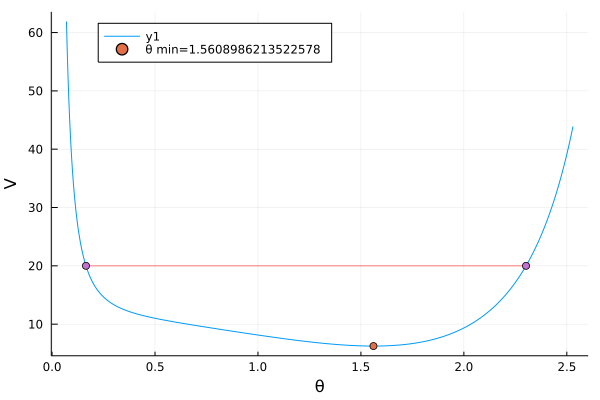

In [7]:
ts = 0.07:0.001:2.53
plot(ts, V.(ts))
scatter!([θ_min,],[V(θ_min)], label="θ min=$θ_min", legend= :top)
plot!([θ_E20_i,θ_E20_f],[V(θ_E20_i),V(θ_E20_f)], label=false, color=:red, alpha=0.5)
scatter!([θ_E20_i,θ_E20_f],[V(θ_E20_i),V(θ_E20_f)], label=false)
yaxis!("V")
xaxis!("θ")

Encontramos ahora $\theta (t)$ para $E' = 20$

In [8]:
θ_0 = θ_E20_i
t_0 = 0
t_f = 0.613999
h = 1e-3
tθ,xθ = Crank_Nicholson(x->dθ(x,20),θ_0,t_0,t_f,h);
tθ_RK4,xθ_RK4 = RK4(x->dθ(x,20),θ_0,t_0,t_f,h);

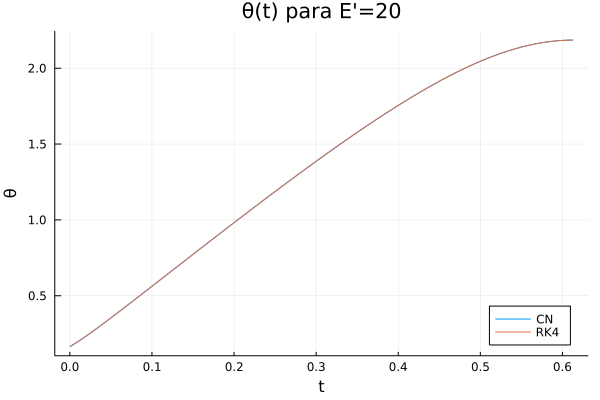

In [9]:
plot(tθ,xθ, label="CN",legend= :bottomright)
plot!(tθ_RK4,xθ_RK4, label="RK4",legend= :bottomright)
xaxis!("t")
yaxis!("θ")
title!("θ(t) para E'=20")

Notamos que $\theta$ se mueve en el rango predicho, además vemos que las líneas coinciden, por lo que ambos algoritmos funcionan bien

Repetimos los mismos pasos pero ahora para $E' = V_{min}$

In [10]:
E_min = V(θ_min)
println(E_min)
println(θ_min)

6.152067565308559
1.5608986213522578


In [11]:
θ_0 = θ_min
t_0 = 0
t_f = 0.613999
h = 1e-3
tθ_min,xθ_min = Crank_Nicholson(x->dθ(x,E_min),θ_0,t_0,t_f,h)
tθ_RK4_min,xθ_RK4_min = RK4(x->dθ(x,E_min),θ_0,t_0,t_f,h);

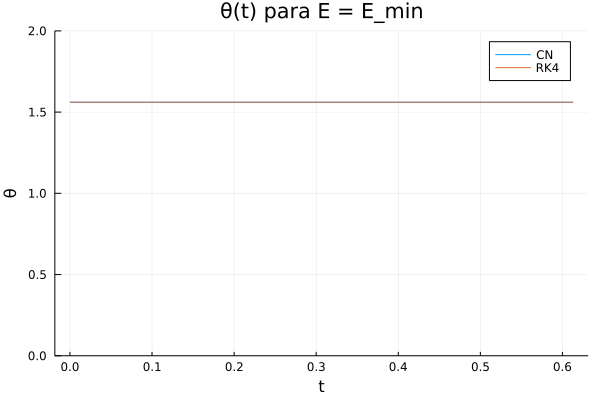

In [12]:
plot(tθ_min,xθ_min, label="CN",legend= :bottomright)
plot!(tθ_RK4_min,xθ_RK4_min, label="RK4",legend= :topright)
xaxis!("t")
yaxis!("θ")
ylims!(0,2)
title!("θ(t) para E = E_min")

Vemos que, con ambos algoritmos, $\theta$ se mantiene constante (en el valor predicho) para esta energía, como debería de ser

Ahora, para encontrar las funciones restantes, haremos una interpolación lineal de la función $\theta (t)$ usando los puntos que se encontraron

In [13]:
θ_20 = InterpolLineal(tθ,xθ)
θ_min = InterpolLineal(tθ_min,xθ_min)

(::var"#f#5"{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},Array{Float64,1}}) (generic function with 1 method)

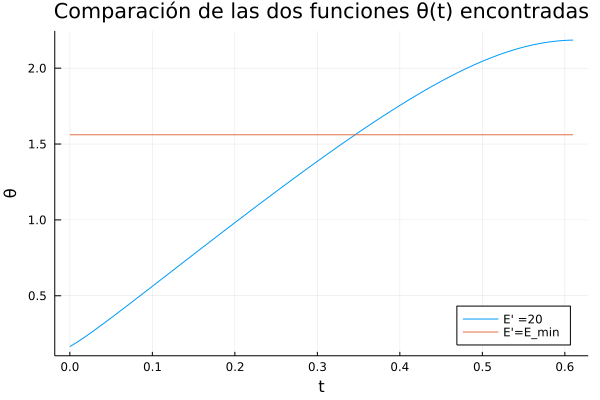

In [14]:
dom = 0:0.01:0.613999
codom_20 = [θ_20(t) for t in dom]
codom_min = [θ_min(t) for t in dom]
plot(dom,codom_20, label="E' =20")  
plot!(dom,codom_min,label="E'=E_min", legend=:bottomright)
title!("Comparación de las dos funciones θ(t) encontradas")
xaxis!("t")
yaxis!("θ")

Teniendo $\theta(t)$ podemos encontrar $\dot{\theta}(t)$

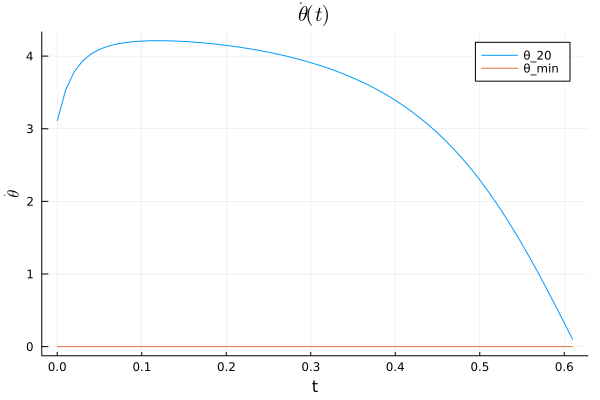

In [15]:
# Recordemos dom = 0:0.01:0.613999
deriv_θ_20 = [dθ(θ_20(t),20) for t in dom]
deriv_θ_min = [dθ(θ_min(t),E_min) for t in dom]
plot(dom, deriv_θ_20, label="θ_20")
plot!(dom, deriv_θ_min,label="θ_min")
title!(L"\dot{\theta}(t)")
xaxis!("t")
yaxis!(L"\dot{\theta}")

Ahora encontramos $\dot{\psi} = \frac{p_\psi}{I_3} - \frac{(p_\varphi - p_\psi \cos{\theta}) \cos{\theta}}{I_1 \sin^2{\theta}}$, para ello, definimos una función auxiliar

In [16]:
ψ20_dot = InterpolLineal(dom,[dψ(θ_20(t)) for t in dom])
ψmin_dot = InterpolLineal(dom,[dψ(θ_min(t)) for t in dom])

(::var"#f#5"{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},Array{Float64,1}}) (generic function with 1 method)

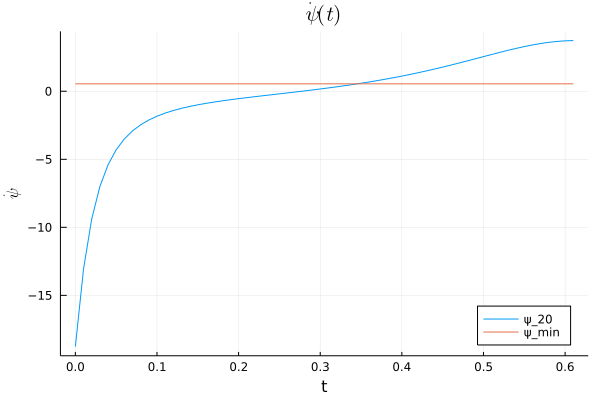

In [17]:
plot(dom, ψ20_dot.(dom), label="ψ_20")
plot!(dom,ψmin_dot.(dom) , label="ψ_min", title=L"\dot{\psi}(t)", legend=:bottomright)
title!(L"\dot{\psi}(t)")
xaxis!("t")
yaxis!(L"\dot{\psi}")

Y ahora buscamos $\psi(t)$

In [18]:
θ_0 = θ_E20_i
t_0 = 0
t_f = 0.613999
h = 1e-3
tψ,xψ = Crank_Nicholson(x->ψ20_dot(x),θ_0,t_0,t_f,h);
tψ_RK4,xψ_RK4 = RK4(x->ψ20_dot(x),θ_0,t_0,t_f,h);

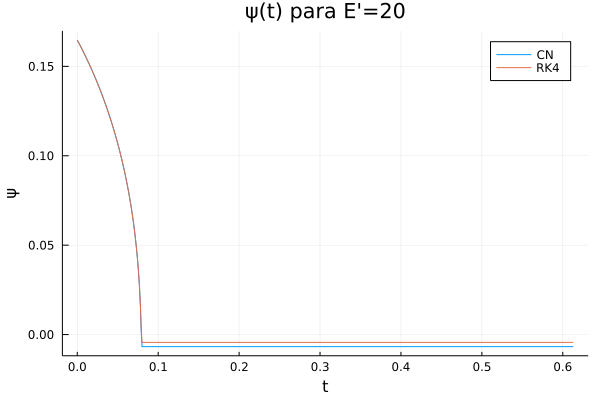

In [19]:
plot(tψ,xψ, label="CN")
plot!(tψ_RK4,xψ_RK4, label="RK4",legend= :topright)
xaxis!("t")
yaxis!("ψ")
title!("ψ(t) para E'=20")

Ahora encontramos $\dot{\varphi} = \frac{p_\varphi - p_\psi \cos{\theta}}{I_1 \sin^2{\theta}}$, primero para $E' = 20$.

Recordemos que Rango de θ: $[0.16471282830342465,2.301895633077816]$ por lo que $\dot{\varphi}$ esta bien definida para todo punto

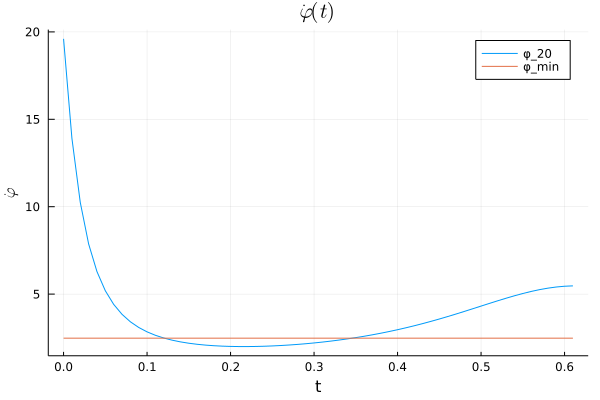

In [20]:
deriv_ϕ_20 = [dϕ(θ_20(t)) for t in dom]
deriv_ϕ_min = [dϕ(θ_min(t)) for t in dom]
plot(dom, deriv_ϕ_20, label="φ_20")
plot!(dom, deriv_ϕ_min, label="φ_min", title=L"\dot{\varphi}(t)")
title!(L"\dot{\varphi}(t)")
xaxis!("t")
yaxis!(L"\dot{\varphi}")

Ahora encontraremos $\varphi(t) $

In [21]:
θ_0 = θ_E20_i
t_0 = 0
t_f = 0.613999
h = 1e-3
tϕ,xϕ = Crank_Nicholson(x->dϕ(θ_20(x)),θ_0,t_0,t_f,h);
tϕ_RK4,xϕ_RK4 = RK4(x->dϕ(θ_20(x)),θ_0,t_0,t_f,h);

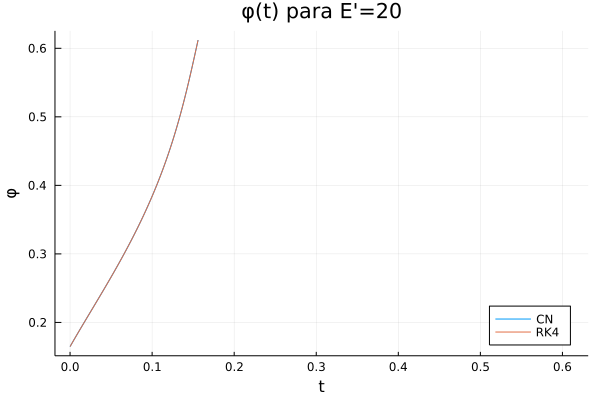

In [22]:
plot(tϕ,xϕ, label="CN")
plot!(tϕ_RK4,xϕ_RK4, label="RK4",legend= :bottomright)
xaxis!("t")
yaxis!("φ")
title!("φ(t) para E'=20")